In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import coco
import utils
import model as modellib
import visualize
from model import log
from Clothes_train import FIDataset

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
dataset_train = FIDataset()
dataset_train.load_FI(category='train')
dataset_train.prepare()

# Validation dataset
dataset_val = FIDataset()
dataset_val.load_FI(category='val')
dataset_val.prepare()

loading image:0/59
loading image:1/59
loading image:2/59
loading image:3/59
loading image:4/59
loading image:5/59
loading image:6/59
loading image:7/59
loading image:8/59
loading image:9/59
loading image:10/59
loading image:11/59
loading image:12/59
loading image:13/59
loading image:14/59
loading image:15/59
loading image:16/59
loading image:17/59
loading image:18/59
loading image:19/59
loading image:20/59
loading image:21/59
loading image:22/59
loading image:23/59
loading image:24/59
loading image:25/59
loading image:26/59
loading image:27/59
loading image:28/59
loading image:29/59
loading image:30/59
loading image:31/59
loading image:32/59
loading image:33/59
loading image:34/59
loading image:35/59
loading image:36/59
loading image:37/59
loading image:38/59
loading image:39/59
loading image:40/59
loading image:41/59
loading image:42/59
loading image:43/59
loading image:44/59
loading image:45/59
loading image:46/59
loading image:47/59
loading image:48/59
loading image:49/59
loading im

loading image:0/441
loading image:1/441
loading image:2/441
loading image:3/441
loading image:4/441
loading image:5/441
loading image:6/441
loading image:7/441
loading image:8/441
loading image:9/441
loading image:10/441
loading image:11/441
loading image:12/441
loading image:13/441
loading image:14/441
loading image:15/441
loading image:16/441
loading image:17/441
loading image:18/441
loading image:19/441
loading image:20/441
loading image:21/441
loading image:22/441
loading image:23/441
loading image:24/441
loading image:25/441
loading image:26/441
loading image:27/441
loading image:28/441
loading image:29/441
loading image:30/441
loading image:31/441
loading image:32/441
loading image:33/441
loading image:34/441
loading image:35/441
loading image:36/441
loading image:37/441
loading image:38/441
loading image:39/441
loading image:40/441
loading image:41/441
loading image:42/441
loading image:43/441
loading image:44/441
loading image:45/441
loading image:46/441
loading image:47/441
lo

loading image:142/441
loading image:143/441
loading image:144/441
loading image:145/441
loading image:146/441
loading image:147/441
loading image:148/441
loading image:149/441
loading image:150/441
loading image:151/441
loading image:152/441
loading image:153/441
loading image:154/441
loading image:155/441
loading image:156/441
loading image:157/441
loading image:158/441
loading image:159/441
loading image:160/441
loading image:161/441
loading image:162/441
loading image:163/441
loading image:164/441
loading image:165/441
loading image:166/441
loading image:167/441
loading image:168/441
loading image:169/441
loading image:170/441
loading image:171/441
loading image:172/441
loading image:173/441
loading image:174/441
loading image:175/441
loading image:176/441
loading image:177/441
loading image:178/441
loading image:179/441
loading image:180/441
loading image:181/441
loading image:182/441
loading image:183/441
loading image:184/441
loading image:185/441
loading image:186/441
loading im


loading image:269/441
loading image:270/441
loading image:271/441
loading image:272/441
loading image:273/441
loading image:274/441
loading image:275/441
loading image:276/441
loading image:277/441
loading image:278/441
loading image:279/441
loading image:280/441
loading image:281/441
loading image:282/441
loading image:283/441
loading image:284/441
loading image:285/441
loading image:286/441
loading image:287/441
loading image:288/441
loading image:289/441
loading image:290/441
loading image:291/441
loading image:292/441
loading image:293/441
loading image:294/441
loading image:295/441
loading image:296/441
loading image:297/441
loading image:298/441
loading image:299/441
loading image:300/441
loading image:301/441
loading image:302/441
loading image:303/441
loading image:304/441
loading image:305/441
loading image:306/441
loading image:307/441
loading image:308/441
loading image:309/441
loading image:310/441
loading image:311/441
loading image:312/441
loading image:313/441
loading i

loading image:420/441
loading image:421/441
loading image:422/441
loading image:423/441
loading image:424/441
loading image:425/441
loading image:426/441
loading image:427/441
loading image:428/441
loading image:429/441
loading image:430/441
loading image:431/441
loading image:432/441
loading image:433/441
loading image:434/441
loading image:435/441
loading image:436/441
loading image:437/441
loading image:438/441
loading image:439/441
loading image:440/441


In [3]:
class InferenceConfig(coco.CocoConfig):
  # Give the configuration a recognizable name
    NAME = "FI"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_KEYPOINTS = 24
    KEYPOINT_MASK_SHAPE = [56, 56]
    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 24 key_point

    RPN_TRAIN_ANCHORS_PER_IMAGE = 150
    VALIDATION_STPES = 100
    STEPS_PER_EPOCH = 100
    MINI_MASK_SHAPE = (56, 56)
    KEYPOINT_MASK_POOL_SIZE = 7
            # Pooled ROIs
    POOL_SIZE = 7
    MASK_POOL_SIZE = 14
    MASK_SHAPE = [28, 28]
    WEIGHT_LOSS = True
    KEYPOINT_THRESHOLD = 0.005
    # Maximum number of ground truth instances to use in one image
    MAX_GT_INSTANCES = 128
inference_config=InferenceConfig()

In [17]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_keypoint =\
    modellib.load_image_gt_keypoints(dataset_val, inference_config, 
                           image_id, augment=False,use_mini_mask=inference_config.USE_MINI_MASK)

original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000
image_meta               shape: (10,)                 min:    0.00000  max:  512.00000
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000
gt_bbox                  shape: (1, 4)                min:   35.00000  max:  479.00000
gt_keypoint              shape: (1, 24, 3)            min:    0.00000  max:  478.00000


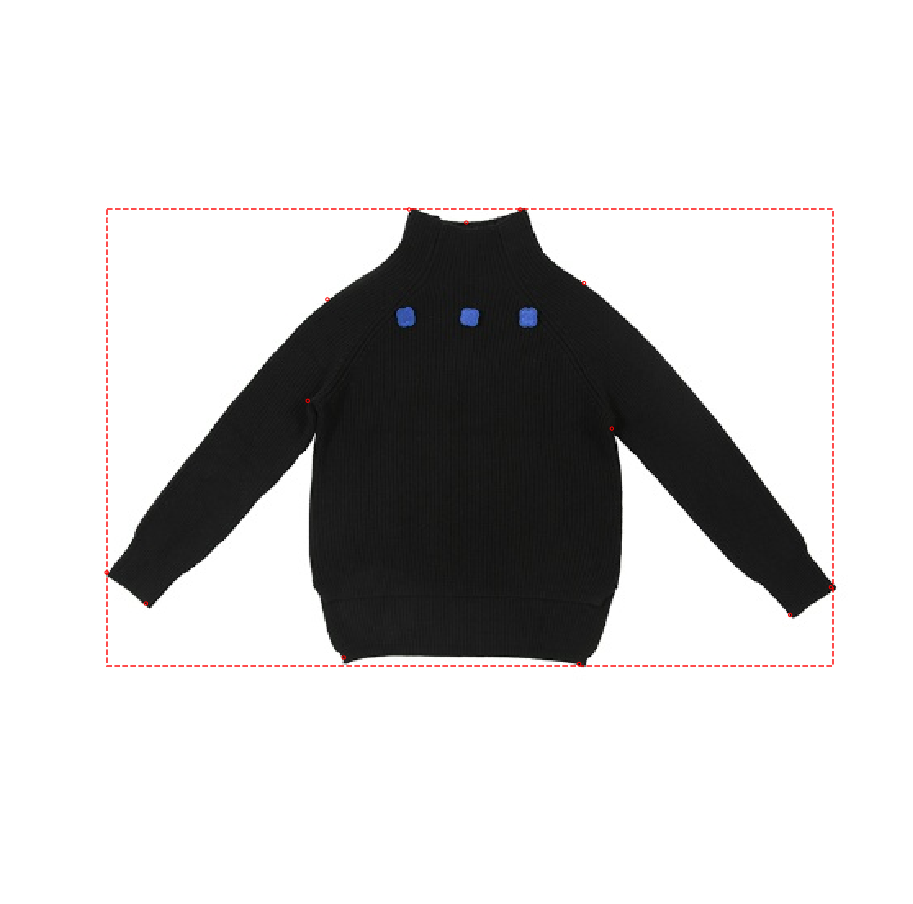

NameError: name 'gt_mask' is not defined

In [18]:
log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_keypoint", gt_keypoint)
visualize.display_keypoints(original_image,gt_bbox,gt_keypoint,gt_class_id,dataset_val.class_names)
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_val.class_names,)

In [21]:
print(gt_bbox.shape)

(1, 4)
